<center>
<h1> Assignment 2: Data Preprocessing</h1>
<hr>
<h2>UFO Sighting Data Exploration</h2>
<hr>
<h3> MCIS 6283-Machine Learning </h3>

<h3><mark>Due date: Feb 23rd 11.30 PM, 2022 (Tuesday)</mark></h3>
<h3>Total Points: 100</h3>

<h4>Instructor: Dr Ashraf Bhuiyan</h4>
<h4>Department of Math & Computer Science</h4>
<h4>Southern Arkansas University</h4>

</center>

### Please put your name, student ID, date and time here (5 points)
* Name:
* Student ID:
* Date:
* Time:

* In this assignment, you will investigate UFO data over the last century to gain some insight.
* Please use all the techniques we have learned in the class to preprocesss/clean the dataset <p style="color:blue"><b>ufo_sightings_large.csv</b></p>. 
* After the dataset is preprocessed, please split the dataset into training sets and test sets
* Fit KNN to the training sets. 
* Print the score of KNN on the test sets

## 1. Import dataset "ufo_sightings_large.csv" in pandas (5 points)

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

df = pd.read_csv('ufo_sightings_large.csv') 

In [3]:
df.head()

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,long
0,11/3/2011 19:21,woodville,wi,us,unknown,1209600.0,2 weeks,Red blinking objects similar to airplanes or s...,12/12/2011,44.9530556,-92.291111
1,10/3/2004 19:05,cleveland,oh,us,circle,30.0,30sec.,Many fighter jets flying towards UFO,10/27/2004,41.4994444,-81.695556
2,9/25/2009 21:00,coon rapids,mn,us,cigar,0.0,NaN,Green&#44 red&#44 and blue pulses of light tha...,12/12/2009,45.1200000,-93.287500
3,11/21/2002 05:45,clemmons,nc,us,triangle,300.0,about 5 minutes,It was a large&#44 triangular shaped flying ob...,12/23/2002,36.0213889,-80.382222
4,8/19/2010 12:55,calgary (canada),ab,ca,oval,0.0,2,A white spinning disc in the shape of an oval.,8/24/2010,51.083333,-114.083333


In [4]:
df.shape

(4935, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4935 non-null   object 
 1   city            4926 non-null   object 
 2   state           4516 non-null   object 
 3   country         4255 non-null   object 
 4   type            4776 non-null   object 
 5   seconds         4935 non-null   float64
 6   length_of_time  4792 non-null   object 
 7   desc            4932 non-null   object 
 8   recorded        4935 non-null   object 
 9   lat             4935 non-null   object 
 10  long            4935 non-null   float64
dtypes: float64(2), object(9)
memory usage: 424.2+ KB


## 2. Checking column types & Converting Column types (10 points)
Take a look at the UFO dataset's column types using the dtypes attribute. Please convert the column types to the proper types.
For example, the date column, which can be transformed into the datetime type. 
That will make our feature engineering efforts easier later on.

In [6]:
df.dtypes

date               object
city               object
state              object
country            object
type               object
seconds           float64
length_of_time     object
desc               object
recorded           object
lat                object
long              float64
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date']) # convert date column to DateTime
df['lat'] = pd.to_numeric(df['lat'], errors='coerce') # convert lat coloumn to numeric (float)

In [8]:
df.dtypes 

date              datetime64[ns]
city                      object
state                     object
country                   object
type                      object
seconds                  float64
length_of_time            object
desc                      object
recorded                  object
lat                      float64
long                     float64
dtype: object

## 3. Dropping missing data (10 points)
Let's remove some of the rows where certain columns have missing values. 

In [9]:
df.isnull().sum()

date                0
city                9
state             419
country           680
type              159
seconds             0
length_of_time    143
desc                3
recorded            0
lat                 9
long                0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df # Null values removed

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,long
0,2011-11-03 19:21:00,woodville,wi,us,unknown,1209600.0,2 weeks,Red blinking objects similar to airplanes or s...,12/12/2011,44.953056,-92.291111
1,2004-10-03 19:05:00,cleveland,oh,us,circle,30.0,30sec.,Many fighter jets flying towards UFO,10/27/2004,41.499444,-81.695556
3,2002-11-21 05:45:00,clemmons,nc,us,triangle,300.0,about 5 minutes,It was a large&#44 triangular shaped flying ob...,12/23/2002,36.021389,-80.382222
4,2010-08-19 12:55:00,calgary (canada),ab,ca,oval,0.0,2,A white spinning disc in the shape of an oval.,8/24/2010,51.083333,-114.083333
5,2012-06-16 23:00:00,san diego,ca,us,light,600.0,10 minutes,Dancing lights that would fly around and then ...,7/4/2012,32.715278,-117.156389
...,...,...,...,...,...,...,...,...,...,...,...
4930,2000-07-05 19:30:00,schnecksville,pa,us,oval,5.0,about 5 seconds,On my bike when i saw a shiny silver oval not ...,7/11/2000,40.667778,-75.607500
4931,2008-03-18 22:00:00,gibson,ga,us,triangle,25.0,25 seconds,Three sided stationary object turning clockwi...,3/31/2008,33.233333,-82.595556
4932,2005-06-15 02:30:00,kent,wa,us,circle,0.0,early morning,Cicle object over Washington state all differe...,10/30/2006,47.381111,-122.233611
4933,1991-11-01 03:00:00,niles,mi,us,triangle,7200.0,2 hours,Triangle zigzagged. Another shined light on u...,9/2/2005,41.829722,-86.254167


In [12]:
df.isnull().sum()

date              0
city              0
state             0
country           0
type              0
seconds           0
length_of_time    0
desc              0
recorded          0
lat               0
long              0
dtype: int64

## 4. Extracting numbers from strings (10 points)
The <b>length_of_time</b> column in the UFO dataset is a text field that has the number of 
minutes within the string. 
Here, you'll extract that number from that text field using regular expressions.

In [13]:
df = df[df['length_of_time'].str.contains('minute|minutes')]

def return_number(length_of_time):
    pattern = re.compile(r'\d+') # pattern to search for
    minute = re.match(pattern, length_of_time) # looks for matches with pattern in entries
    if minute is not None:
        return int(minute.group(0)) # returns the match

df['minutes'] = df['length_of_time'].apply(lambda row: return_number(row)) #iterates over every row-value of length_of_time
print(df[['length_of_time', 'minutes']].head())

     length_of_time  minutes
3   about 5 minutes      NaN
5        10 minutes     10.0
8         2 minutes      2.0
9         2 minutes      2.0
10        5 minutes      5.0


## 5. Identifying features for standardization (10 points)
In this section, you'll investigate the variance of columns in the UFO dataset to 
determine which features should be standardized. You can log normlize the high variance column.

In [14]:
print(df.var())

seconds    412802.544655
lat            31.912671
long          328.236396
minutes       115.248881
dtype: float64


In [15]:
# seconds column has high variance, So log normalize the values to avoid biasing the model.

In [16]:
df['seconds_log'] = np.log(df['seconds'])
print(df['seconds_log'].var())

1.1077943347836423


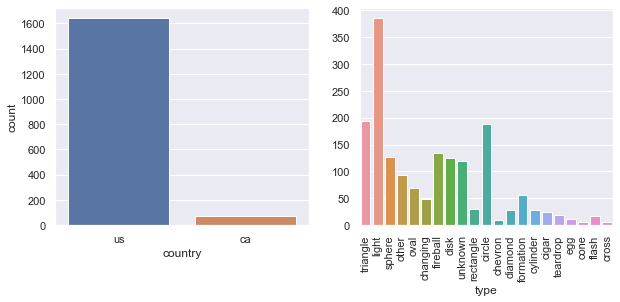

In [17]:
sns.set()
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
country = sns.countplot(x=df['country'], ax=ax[0])
type = sns.countplot(x=df['type'], ax=ax[1])
type.set_xticklabels(labels=df.type.unique(), rotation=90)
type = plt.ylabel('')

plt.show()

## 6. Encoding categorical variables (20 points)
There are couple of columns in the UFO dataset that need to be encoded before they can be 
modeled through scikit-learn. 
You'll do that transformation here, <b>using both binary and one-hot encoding methods</b>.

In [18]:
df['country'] = np.where(df['country']=='us', 1, 0) 
df_type = pd.get_dummies(df['type'], drop_first=True)
df = pd.concat([df, df_type], axis=1)

In [19]:
df['month'] = df['date'].apply(lambda date: date.month) # iterate over all date-values and extract the month
df['year'] = df['date'].apply(lambda date: date.year) # iterate over all date-values and extract the year

df[['date', 'month', 'year']].head()

,date,month,year
3,2002-11-21 05:45:00,11,2002
5,2012-06-16 23:00:00,6,2012
8,2013-06-09 00:00:00,6,2013
9,2013-04-26 23:27:00,4,2013
10,2013-09-13 20:30:00,9,2013


In [20]:
df

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,...,light,other,oval,rectangle,sphere,teardrop,triangle,unknown,month,year
3,2002-11-21 05:45:00,clemmons,nc,1,triangle,300.0,about 5 minutes,It was a large&#44 triangular shaped flying ob...,12/23/2002,36.021389,...,0,0,0,0,0,0,1,0,11,2002
5,2012-06-16 23:00:00,san diego,ca,1,light,600.0,10 minutes,Dancing lights that would fly around and then ...,7/4/2012,32.715278,...,1,0,0,0,0,0,0,0,6,2012
8,2013-06-09 00:00:00,oakville (canada),on,0,light,120.0,2 minutes,Brilliant orange light or chinese lantern at o...,7/3/2013,43.433333,...,1,0,0,0,0,0,0,0,6,2013
9,2013-04-26 23:27:00,lacey,wa,1,light,120.0,2 minutes,Bright red light moving north to north west fr...,5/15/2013,47.034444,...,1,0,0,0,0,0,0,0,4,2013
10,2013-09-13 20:30:00,ben avon,pa,1,sphere,300.0,5 minutes,North-east moving south-west. First 7 or so li...,9/30/2013,40.508056,...,0,0,0,0,1,0,0,0,9,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,2002-08-20 23:10:00,noxon,mt,1,unknown,2700.0,45 minutes,Large craft spotted in Northwest Montana,8/28/2002,47.996111,...,0,0,0,0,0,0,0,1,8,2002
4927,2013-07-04 21:00:00,wilmington,nc,1,oval,300.0,5 minutes,Two lit &quot;Crafts&quot; fly over &#44 witne...,9/9/2013,34.225556,...,0,0,1,0,0,0,0,0,7,2013
4928,2008-11-10 00:30:00,uniontown,oh,1,changing,180.0,3 minutes,11/10/08 0:30/ Uniontown Ohio/Shape Round/Dur...,1/10/2009,40.975000,...,0,0,0,0,0,0,0,0,11,2008
4929,1998-06-25 22:18:00,las cruces,nm,1,circle,180.0,3 minutes,My father and i were driving home from El Paso...,11/21/1998,32.312222,...,0,0,0,0,0,0,0,0,6,1998


## 7. Text vectorization (10 points)
Let's transform the <b>desc</b> column in the UFO dataset into tf/idf vectors, 
since there's likely something we can learn from this field.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
desc_tfidf = tfidf_vec.fit_transform(df['desc'])
print(desc_tfidf.toarray().shape)

(1718, 3235)


## 8. Selecting the ideal dataset (10 points)
Let's get rid of some of the unnecessary features. 

In [22]:
corr = df[['seconds','seconds_log','minutes']].corr()
corr.style.background_gradient(cmap='coolwarm')

,seconds,seconds_log,minutes
seconds,1.000000,0.854300,0.979260
seconds_log,0.854300,1.000000,0.823576
minutes,0.979260,0.823576,1.000000


In [23]:
to_drop = ["city", "date", "lat", "length_of_time", "long", "minutes", "recorded", "seconds", "state"]
df = df.drop(to_drop, axis = 1)
df = df.drop("desc", axis = 1)

In [24]:
X = df.drop(['type', 'country'], axis = 1)
y = df['country'].values

In [25]:
X

,seconds_log,chevron,cigar,circle,cone,cross,cylinder,diamond,disk,egg,...,light,other,oval,rectangle,sphere,teardrop,triangle,unknown,month,year
3,5.703782,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,11,2002
5,6.396930,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6,2012
8,4.787492,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6,2013
9,4.787492,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,4,2013
10,5.703782,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,9,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,7.901007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,8,2002
4927,5.703782,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,7,2013
4928,5.192957,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,2008
4929,5.192957,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,1998


In [26]:
y

array([1, 1, 0, ..., 1, 1, 1])

## 9. Split the X and y using train_test_split, setting stratify = y (5 points)

In [27]:

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

## 10. Fit knn to the training sets and print the score of knn on the test sets (5 points)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit knn to the training sets
knn.fit(train_X, train_y)
# Print the score of knn on the test sets
print(knn.score(test_X, test_y))

0.9558139534883721
